<a href="https://colab.research.google.com/github/ylshaw/FlutterExampleApps/blob/master/GENMrsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving GENM Historical Data.csv to GENM Historical Data.csv


In [13]:
Genm = pd.read_csv('GENM Historical Data.csv')
Genm= Genm.iloc[::-1, :]

Genm = Genm.set_index(pd.DatetimeIndex(Genm['Date'].values))
Genm

,Date,Price,Open,High,Low,Vol.,Change %
2015-01-02,"Jan 02, 2015",4.05,4.07,4.07,4.02,1.13M,-0.49%
2015-01-05,"Jan 05, 2015",3.96,4.05,4.06,3.94,1.73M,-2.22%
2015-01-06,"Jan 06, 2015",3.94,3.94,4.01,3.91,5.42M,-0.51%
2015-01-07,"Jan 07, 2015",3.92,3.94,3.96,3.89,7.92M,-0.51%
2015-01-08,"Jan 08, 2015",3.94,3.93,3.96,3.92,2.93M,0.51%
...,...,...,...,...,...,...,...
2020-08-21,"Aug 21, 2020",2.22,2.19,2.25,2.16,59.42M,-3.48%
2020-08-24,"Aug 24, 2020",2.21,2.25,2.25,2.21,12.02M,-0.45%
2020-08-25,"Aug 25, 2020",2.21,2.22,2.24,2.21,7.18M,0.00%
2020-08-26,"Aug 26, 2020",2.23,2.22,2.23,2.19,10.52M,0.90%


In [14]:
Genm['Last Price'] = Genm['Price']

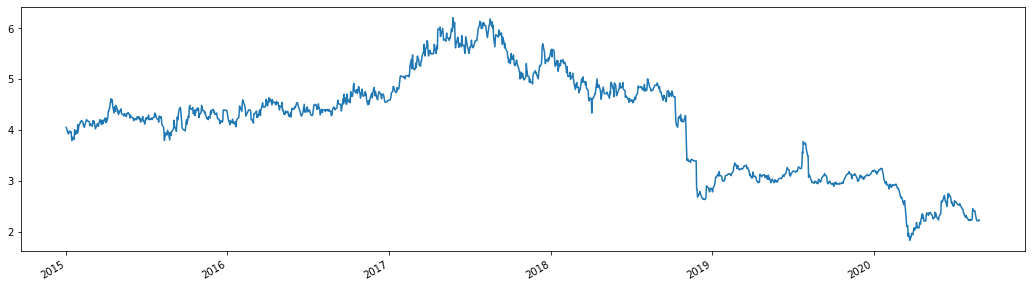

In [15]:
import matplotlib.pyplot as plt
Genm['Last Price'].plot(figsize=(18,5))

Calculate RSI

First get difference in Last Price from previous day

In [17]:
delta = Genm['Last Price'].diff(1)
delta

2015-01-02     NaN
2015-01-05   -0.09
2015-01-06   -0.02
2015-01-07   -0.02
2015-01-08    0.02
              ... 
2020-08-21   -0.08
2020-08-24   -0.01
2020-08-25    0.00
2020-08-26    0.02
2020-08-27    0.00
Name: Last Price, Length: 1385, dtype: float64

In [18]:
delta = delta.dropna()
delta

2015-01-05   -0.09
2015-01-06   -0.02
2015-01-07   -0.02
2015-01-08    0.02
2015-01-09    0.04
              ... 
2020-08-21   -0.08
2020-08-24   -0.01
2020-08-25    0.00
2020-08-26    0.02
2020-08-27    0.00
Name: Last Price, Length: 1384, dtype: float64

Get positive and negative gains

In [19]:
up = delta.copy()
down = delta.copy()

up[up<0] = 0
down[down>0] = 0


Get the time period of 14 days and calculate the average gain and average loss

In [20]:
period = 14
Avg_Gain = up.rolling(window=period).mean()
Avg_Loss = abs(down.rolling(window=period).mean())

Calculate the RSI -- first the RS

In [21]:
RS = Avg_Gain/Avg_Loss
RSI = 100.0 - (100.00/(1.0 + RS))

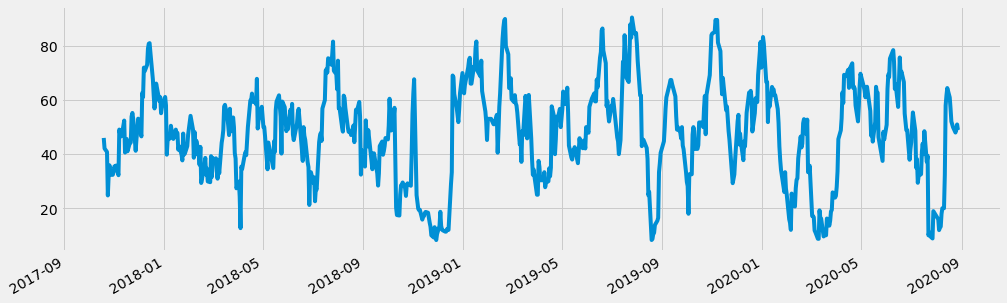

In [22]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,5))
RSI.tail(700).plot()
plt.show()

In [23]:
#create new data frame

new_Genm = pd.DataFrame()
new_Genm['Last Price'] = Genm['Last Price']
new_Genm['RSI'] = RSI
new_Genm

,Last Price,RSI
2015-01-02,4.05,NaN
2015-01-05,3.96,NaN
2015-01-06,3.94,NaN
2015-01-07,3.92,NaN
2015-01-08,3.94,NaN
...,...,...
2020-08-21,2.22,50.000000
2020-08-24,2.21,48.000000
2020-08-25,2.21,48.979592
2020-08-26,2.23,50.980392


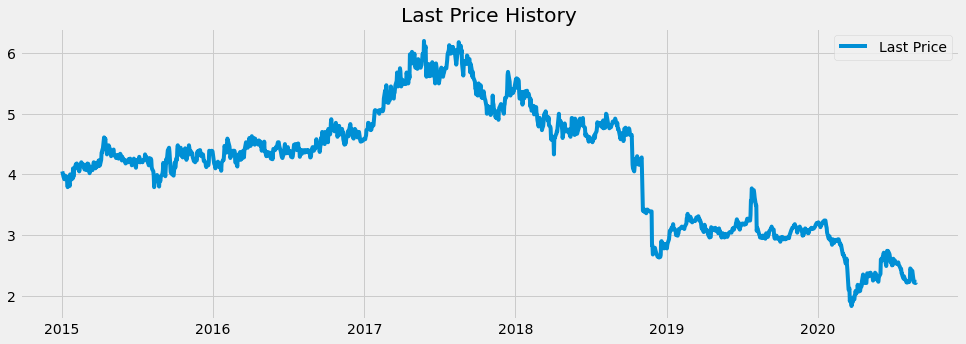

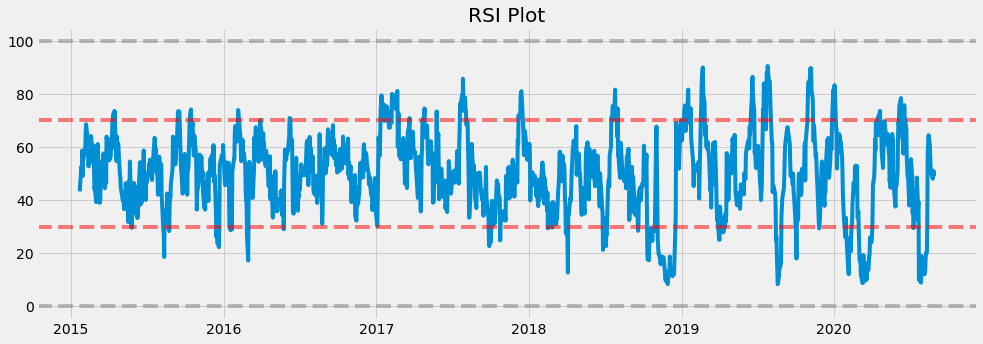

In [29]:
#%matplotlib inline
plt.figure(figsize=(15,5))
plt.plot(new_Genm.index, new_Genm['Last Price'])
plt.title('Last Price History')
plt.legend(new_Genm.columns.values, loc='upper right')
plt.show()
plt.figure(figsize=(15,5))
plt.title('RSI Plot')
plt.plot(new_Genm.index,new_Genm['RSI'])
plt.axhline(0, linestyle='--', alpha =0.5, color='gray')
#plt.axhline(10, linestyle='--', alpha =0.5, color='orange')
#plt.axhline(20, linestyle='--', alpha =0.5, color='green')
plt.axhline(30, linestyle='--', alpha =0.5, color='red')
plt.axhline(70, linestyle='--', alpha =0.5, color='red')
#plt.axhline(80, linestyle='--', alpha =0.5, color='green')
#plt.axhline(90, linestyle='--', alpha =0.5, color='orange')
plt.axhline(100, linestyle='--', alpha =0.5, color='gray')
plt.show()